In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import attila_utils

## Summary statistics

In [2]:
fpath = '../../resources/cell-based-assays/CO28151_outcome summary.xlsx'
sheet_name = 'CO28151'
CO28151 = pd.read_excel(fpath, sheet_name=sheet_name)

fpath = '../../resources/cell-based-assays/CO28151_outcome-summary_27062023-clean.xlsx'
sheet_name = 'CO28151'
CO28151_27062023 = pd.read_excel(fpath, sheet_name=sheet_name)
CO28151_27062023['study'] = 'CO28151'

sheet_name = 'CO25360'
CO25360_27062023 = pd.read_excel(fpath, sheet_name=sheet_name)
CO25360_27062023['study'] = 'CO25360'

### Assays

Assays in CO28151 before 2023 June 27

In [3]:
print(len(CO28151.assay.unique()), 'assays')
list(CO28151.assay.unique())

11 assays


['Abeta celarance supernatant',
 'Abeta celarance intracellular',
 'growth factor removal MTT',
 'growth factor removal LDH',
 'Abeta secretion 1-42',
 'Abeta secretion 1-40',
 'LPS inflammation TNFa',
 'LPS inflammation IL1b',
 'LPS inflammation IL6',
 'LPS inflammation KC/GRO',
 'LPS inflammation MTT']

Assays in CO28151 after 2023 June 27

In [4]:
print(len(CO28151_27062023.assay.unique()), 'assays')
list(CO28151_27062023.assay.unique())

14 assays


['Abeta celarance intracellular',
 'Abeta celarance supernatant',
 'Abeta secretion 1-40',
 'Abeta secretion 1-42',
 'growth factor removal LDH',
 'growth factor removal MTT',
 'LPS inflammation IL1b',
 'LPS inflammation IL6',
 'LPS inflammation KC/GRO',
 'LPS inflammation MTT',
 'LPS inflammation TNFa',
 'pTau 231',
 'pTau 231 vs total Tau',
 'Total Tau']

Assays in CO28151 added on 2023 June 27

In [5]:
set(CO28151_27062023.assay.unique()).difference(set(CO28151.assay.unique()))

{'Total Tau', 'pTau 231', 'pTau 231 vs total Tau'}

The same set of assays are contained in CO25360 as in CO28151

In [6]:
set(CO28151_27062023.assay.unique()) == set(CO25360_27062023.assay.unique())

True

### Treatments

Treatments in CO28151 before 2023 June 27

In [7]:
print(len(CO28151.TI.unique()), 'treatments')
treatments_CO28151 = pd.DataFrame(*[CO28151.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO28151

13 treatments


,name
TI,
TI1,Amiloride
TI11,DIM-C-pPhOCH3
TI12,C-DIM12
TI13,Liraglutide
TI14,Semaglutide
TI2,Phenamil methanesulfonate salt
TI3,Benzamil hydrochloride hydrate
TI4,"5-(N,N-Dimethyl)amiloride hydrochloride"
TI5,5-(N-Ethyl-N-isopropyl)amiloride


Treatments in CO28151 after on 2023 June 27

In [8]:
print(len(CO28151_27062023.TI.unique()), 'treatments')
treatments_CO28151_27062023 = pd.DataFrame(*[CO28151_27062023.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO28151_27062023

17 treatments


,name
TI,
TI1,Amiloride
TI10,Cilostazol
TI11,DIM-C-pPhOCH3
TI12,C-DIM12
TI13,Liraglutide
TI14,Semaglutide
TI15,Hydroxychloroquine racemic
TI16/17,"(S)Hydroxychloroquine racemic, free base"
TI18/19,"(R)Hydroxychloroquine racemic, free base"


Treatments in CO28151 added on 2023 June 27

In [9]:
treatments_CO28151_27062023.loc[list(set(treatments_CO28151_27062023.index).difference(set(treatments_CO28151.index)))]

,name
TI,
TI10,Cilostazol
TI18/19,"(R)Hydroxychloroquine racemic, free base"
TI16/17,"(S)Hydroxychloroquine racemic, free base"
TI15,Hydroxychloroquine racemic


Treatments in CO25360

In [10]:
print(len(CO25360_27062023.TI.unique()), 'treatments')
treatments_CO25360_27062023 = pd.DataFrame(*[CO25360_27062023.groupby(['TI', 'name']).first().index.get_level_values(i) for i in [1, 0]])
treatments_CO25360_27062023

27 treatments


,name
TI,
TI1,VALPROIC ACID
TI10,DASATINIB
TI11,FLUTICASONE
TI12,METHOTREXATE
TI13,HYDROXYCHLOROQUINE
TI14,ROFLUMILAST
TI15,NAPABUCASIN
TI16,CRIZOTINIB
TI17,C188-9


In [11]:
# concatenate the two studies
datasum = pd.concat([CO28151_27062023, CO25360_27062023], axis=0)
datasumc1wide = datasum.groupby(['study', 'TI', 'assay']).first()['Mean Diff,'].unstack()
assay_pretty_names = {
    'Abeta celarance intracellular': 'Aβ42 clearance: Lys',
    'Abeta celarance supernatant': 'Aβ42 clearance: SN',
    'Abeta secretion 1-40': 'Aβ secretion: Aβ40',
    'Abeta secretion 1-42': 'Aβ secretion: Aβ42',
    'LPS inflammation IL1b': 'LPS inflammation: IL-1β',
    'LPS inflammation IL6': 'LPS inflammation: IL-6',
    'LPS inflammation KC/GRO': 'LPS inflammation: KC/GRO',
    'LPS inflammation MTT': 'LPS inflammation: MTT',
    'LPS inflammation TNFa': 'LPS inflammation: TNFα',
    'Total Tau': 'Tau phoshorylation: total Tau',
    'growth factor removal LDH': 'Growt factor withdrawal: LDH',
    'growth factor removal MTT': 'Growth factor withdrawal: MTT',
    'pTau 231': 'Tau phoshorylation: pTau (T231)',
    'pTau 231 vs total Tau': 'Tau phoshorylation: pT/T ratio',
}
datasumc1wide = datasumc1wide.rename(assay_pretty_names, axis=1)
datasumc1wide

assay            Aβ42 clearance: Lys  Aβ42 clearance: SN  Aβ secretion: Aβ40  \
study   TI                                                                     
CO25360 TI1                 -0.48800              -16.30             -604.00   
        TI10                -1.10000                7.28             2186.00   
        TI11                -0.58500              -23.30             -352.00   
        TI12                -0.30500              -14.00            -1352.00   
        TI13                -0.58000               37.90             -277.00   
        TI14                -1.43000              -13.30            -3217.00   
        TI15                -1.20000             -200.00             9677.00   
        TI16                -0.09900              -24.30             8310.00   
        TI17                -0.29500              -19.50              360.00   
        TI18              1873.00000              314.00              640.00   
        TI19             -1971.00000             3114.00              191.00   
        TI2                  0.31800               11.70            -2285.00   
        TI20            -41144.00000             7609.00             7415.00   
        TI21            -19800.00000             9250.00            16355.00   
        TI22             28389.00000            -8589.00             6842.00   
        TI23             24628.00000            -4177.00              841.30   
        TI24              8766.00000            -8015.00             2407.00   
        TI25             -7681.00000            -1712.00               71.17   
        TI26             -7719.00000             4470.00             2216.00   
        TI27             -9934.00000            13323.00             3435.00   
        TI3                 -0.11700              -31.00             -525.00   
        TI4                 -0.19000               12.50             -793.00   
        TI5                 -0.86500             -131.00             1309.00   
        TI6                 -0.30300              -12.50             7269.00   
        TI7                 -0.14800              -24.30            -2698.00   
        TI8                 -0.05330              -70.60            -2249.00   
        TI9                  0.14200              -32.10            -1662.00   
CO28151 TI1                  0.08000             6078.00           273952.00   
        TI10                 0.15810            25963.00                 NaN   
        TI11                 0.12830             6273.00          -113103.00   
        TI12                -0.05333              906.80          -835016.00   
        TI13                -0.28830           -26889.00            -3592.00   
        TI14                 0.08333             -192.70          -180633.00   
        TI15                 0.39520            14812.00                 NaN   
        TI16/17              0.55500              715.80                 NaN   
        TI18/19             -1.52100            13263.00                 NaN   
        TI2                 -1.79000             7889.00           951443.00   
        TI3                 -0.32000             7398.00          1535868.00   
        TI4                 -0.59670            11579.00          1254891.00   
        TI5                 -3.17700            12536.00           957888.00   
        TI6                 -1.81800             6853.00           -21838.00   
        TI7                 -0.58500             8891.00           965683.00   
        TI8                 -0.14240            29453.00                 NaN   
        TI9                 -1.44000            68649.00                 NaN   

assay            Aβ secretion: Aβ42  LPS inflammation: IL-1β  \
study   TI                                                     
CO25360 TI1                  -47.80                 -0.04670   
        TI10                 164.00                 -1.60000   
        TI11                 -79.00                  0.86500   

In [12]:
print(datasumc1wide.shape[0], 'treatments')
print(datasumc1wide.shape[1], 'assays')
print(datasumc1wide.shape[0], '*', datasumc1wide.shape[1], '=', datasumc1wide.shape[0] * datasumc1wide.shape[1], 'treatment-assay combinations')
print(datasumc1wide.isna().sum().sum(), '(', np.round(100 * datasumc1wide.isna().sum().sum() / 616), '% )', 'unmeasured combinations')

44 treatments
14 assays
44 * 14 = 616 treatment-assay combinations
72 ( 12.0 % ) unmeasured combinations


In [13]:
datasumc1 = datasumc1wide.stack()
datasumc1.index = datasumc1.index.rename({'TI': 'ti'})
datasumc1 = datasumc1.to_frame('Data summary')
datasumc1

Data summary
study   ti  assay                                      
CO25360 TI1 Aβ42 clearance: Lys                 -0.4880
            Aβ42 clearance: SN                 -16.3000
            Aβ secretion: Aβ40                -604.0000
            Aβ secretion: Aβ42                 -47.8000
            LPS inflammation: IL-1β             -0.0467
...                                                 ...
CO28151 TI9 LPS inflammation: KC/GRO             4.0430
            LPS inflammation: MTT               97.3300
            LPS inflammation: TNFα            1394.0000
            Growt factor withdrawal: LDH       -50.1700
            Growth factor withdrawal: MTT       54.3300

[544 rows x 1 columns]

## Older 

## Raw data

This function was used to conver wide-formatted data on sheet `GF withdrawal 0` to long-formatted data on sheet `GF withdrawal`.

In [14]:
def wide2long_form(batch, plate, assay):
    df = pd.read_clipboard()
    activity = df.stack().to_frame('Activity')
    batch = pd.DataFrame({'Batch': batch}, index=activity.index)
    plate = pd.DataFrame({'Plate': plate}, index=activity.index)
    assay = pd.DataFrame({'Assay': assay}, index=activity.index)
    middle = df.stack().index.to_frame().rename({0: 'Replica', 1: 'TI_conc'}, axis=1)
    TI = middle.TI_conc.apply(lambda s: re.sub('^(TI[0-9]{1,2}).*$', '\\1', s)).to_frame('TI')
    conc = middle.TI_conc.apply(lambda s: re.match('.*c[0-9]{1,2}$', s))
    conc = conc.apply(lambda x: re.sub('^(TI[0-1]{1,2}\\s+)(c[0-9]{1,2})$', '\\2', x.string) if x is not None else '').to_frame('conc')
    l = [batch, plate, TI, conc, assay, activity]
    long = pd.concat(l, axis=1)
    long.to_clipboard(index=False, header=False)
    return(long)

In [15]:
def get_conc_index(df):
    sorted_conc_levels = df.conc.dropna().sort_values().unique()
    d = dict(zip(sorted_conc_levels, np.arange(len(sorted_conc_levels)) + 1))
    conc_index = df.conc.apply(lambda x: d[x] if x is not np.nan else np.nan)
    return(conc_index)

In [16]:
fpath = '../../resources/cell-based-assays/CO28151_data-summary-clean.xlsx'
datad = dict()
key = 'Abeta Clearance'
df = pd.read_excel(fpath, sheet_name=key)
df = df[['Batch', 'Plate', 'TI', 'conc', 'Aβ42 SN', 'Aβ42 Lys']]
df = df.melt(id_vars=['Batch', 'Plate', 'TI', 'conc'], var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {'Aβ42 Lys': 'Aβ42 clearance: Lys', 'Aβ42 SN': 'Aβ42 clearance: SN'}[x])
df['conc_ix'] = get_conc_index(df)
datad['Aβ42 clearance'] = df
datad['Aβ42 clearance']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix
0,NaN,1.0,TI2,c1,Aβ42 SN,35.0,Aβ42 clearance: SN,1.0
1,NaN,1.0,TI2,c1,Aβ42 SN,102.0,Aβ42 clearance: SN,1.0
2,NaN,1.0,TI2,c1,Aβ42 SN,51.0,Aβ42 clearance: SN,1.0
3,NaN,1.0,TI2,c1,Aβ42 SN,37.0,Aβ42 clearance: SN,1.0
4,NaN,1.0,TI2,c1,Aβ42 SN,55.0,Aβ42 clearance: SN,1.0
...,...,...,...,...,...,...,...,...
605,NaN,1.0,VC_1,NaN,Aβ42 Lys,3023.0,Aβ42 clearance: Lys,NaN
606,NaN,2.0,VC_2,NaN,Aβ42 Lys,1492.0,Aβ42 clearance: Lys,NaN
607,NaN,2.0,VC_2,NaN,Aβ42 Lys,456.0,Aβ42 clearance: Lys,NaN
608,NaN,2.0,VC_2,NaN,Aβ42 Lys,195.0,Aβ42 clearance: Lys,NaN


In [17]:
key = 'Abeta secretion'
df = pd.read_excel(fpath, sheet_name=key)
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=['Aβ38', 'Aβ40', 'Aβ42'], var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {'Aβ38': 'Aβ secretion: Aβ38', 'Aβ40': 'Aβ secretion: Aβ40', 'Aβ42': 'Aβ secretion: Aβ42'}[x])
df['conc_ix'] = get_conc_index(df)
datad['Aβ secretion'] = df
datad['Aβ secretion']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix
0,NaN,1,TI2,c1,Aβ38,4010.0000,Aβ secretion: Aβ38,2
1,NaN,1,TI2,c1,Aβ38,6280.0000,Aβ secretion: Aβ38,2
2,NaN,1,TI2,c1,Aβ38,27790.0000,Aβ secretion: Aβ38,2
3,NaN,1,TI2,c1,Aβ38,32560.0000,Aβ secretion: Aβ38,2
4,NaN,1,TI2,c1,Aβ38,20670.0000,Aβ secretion: Aβ38,2
...,...,...,...,...,...,...,...,...
841,NaN,5,TI15,c3,Aβ42,979.6982,Aβ secretion: Aβ42,4
842,NaN,5,TI15,c3,Aβ42,1072.2790,Aβ secretion: Aβ42,4
843,NaN,5,TI15,c3,Aβ42,1086.8330,Aβ secretion: Aβ42,4
844,NaN,5,TI15,c3,Aβ42,1070.6570,Aβ secretion: Aβ42,4


In [18]:
key = 'GF withdrawal'
df = pd.read_excel(fpath, sheet_name=key)
df['Assay_pretty'] = df.Assay.apply(lambda a: 'Growth factor withdrawal: ' + a)
df['conc_ix'] = get_conc_index(df)
datad['Growth factor withdrawal'] = df
datad['Growth factor withdrawal']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix
0,1,1,TI1,c1,MTT,0.180,Growth factor withdrawal: MTT,37.0
1,1,1,TI1,c1,MTT,0.185,Growth factor withdrawal: MTT,37.0
2,1,1,TI1,c1,MTT,0.196,Growth factor withdrawal: MTT,37.0
3,1,1,RI,NaN,MTT,0.306,Growth factor withdrawal: MTT,NaN
4,1,1,VC,NaN,MTT,0.206,Growth factor withdrawal: MTT,NaN
...,...,...,...,...,...,...,...,...
727,2,1,VC,NaN,LDH,0.084,Growth factor withdrawal: LDH,NaN
728,2,1,RI,NaN,LDH,0.067,Growth factor withdrawal: LDH,NaN
729,2,1,TI15,TI15 c1,LDH,0.108,Growth factor withdrawal: LDH,13.0
730,2,1,TI15,TI15 c2,LDH,0.084,Growth factor withdrawal: LDH,14.0


In [19]:
key = 'LPS inflammation'
df = pd.read_excel(fpath, sheet_name=key)
assay_names = ['IL-10', 'IL-1β', 'IL-6', 'KC/GRO', 'TNF-α']
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=assay_names, var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {a: 'LPS inflammation: ' + a for a in assay_names}[x])
df['conc_ix'] = get_conc_index(df)
datad['LPS inflammation'] = df
datad['LPS inflammation']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix
0,NaN,1,TI2,c1,IL-10,1.46,LPS inflammation: IL-10,1.0
1,NaN,1,TI2,c1,IL-10,3.23,LPS inflammation: IL-10,1.0
2,NaN,1,TI2,c1,IL-10,2.81,LPS inflammation: IL-10,1.0
3,NaN,1,TI2,c1,IL-10,2.57,LPS inflammation: IL-10,1.0
4,NaN,1,TI2,c1,IL-10,3.15,LPS inflammation: IL-10,1.0
...,...,...,...,...,...,...,...,...
2185,NaN,4,VC 4,c4,TNF-α,15.0,LPS inflammation: TNF-α,4.0
2186,NaN,4,VC 4,c4,TNF-α,18.0,LPS inflammation: TNF-α,4.0
2187,NaN,4,VC 4,c4,TNF-α,13.0,LPS inflammation: TNF-α,4.0
2188,NaN,4,VC 4,c4,TNF-α,19.0,LPS inflammation: TNF-α,4.0


In [20]:
key = 'Tau phosphorylation'
df = pd.read_excel(fpath, sheet_name=key)
df = df.rename({'Tau  [pg/µg]': 'Tau', 'pTau (T231) [AU2]': 'pTau (T231)', 'Ratio pTau /Tau': 'pT/T ratio'}, axis=1)
#assay_names = ['Tau [pg/µg]', 'pTau (T231) [AU2]', 'Ratio pTau /Tau']
assay_names = ['Tau', 'pTau (T231)', 'pT/T ratio']
df = pd.melt(df, id_vars=['Batch', 'Plate', 'TI', 'conc'], value_vars=assay_names, var_name='Assay', value_name='Activity')
df['Assay_pretty'] = df.Assay.apply(lambda x: {a: 'Tau phoshorylation: ' + a for a in assay_names}[x])
df['conc_ix'] = get_conc_index(df)
datad['Tau phoshorylation'] = df
datad['Tau phoshorylation']

,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix
0,1,5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau,1
1,1,5,TI1,c1,Tau,1.7,Tau phoshorylation: Tau,1
2,1,5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau,1
3,1,5,TI1,c1,Tau,2.1,Tau phoshorylation: Tau,1
4,1,5,TI1,c1,Tau,1.0,Tau phoshorylation: Tau,1
...,...,...,...,...,...,...,...,...
1093,1,5,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio,5
1094,1,5,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio,5
1095,1,5,VC,c5,pT/T ratio,9.8,Tau phoshorylation: pT/T ratio,5
1096,1,5,VC,c5,pT/T ratio,2.0,Tau phoshorylation: pT/T ratio,5


<Axes: xlabel='pTau (T231) [AU]', ylabel='pTau (T231) [AU2]'>

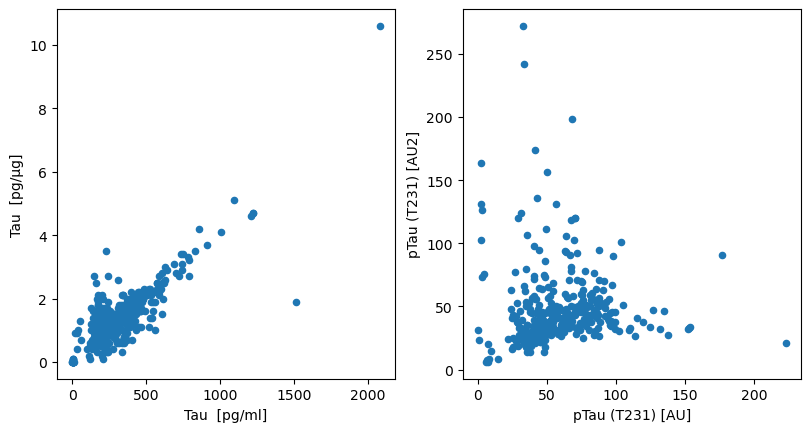

In [21]:
df = pd.read_excel(fpath, sheet_name='Tau phosphorylation')
fig, ax = plt.subplots(1, 2, figsize=(9.6, 4.8))
df.plot(kind='scatter', x='Tau  [pg/ml]', y='Tau  [pg/µg]', ax=ax[0])
df.plot(kind='scatter', x='pTau (T231) [AU]', y='pTau (T231) [AU2]', ax=ax[1])

In [22]:
data = pd.concat([pd.concat([pd.DataFrame({'Experiment': k}, index=v.index), v], axis=1) for k, v in datad.items()], axis=0)
data['Study'] = 'CO28151'
data

,Experiment,Batch,Plate,TI,conc,Assay,Activity,Assay_pretty,conc_ix,Study
0,Aβ42 clearance,NaN,1.0,TI2,c1,Aβ42 SN,35.0,Aβ42 clearance: SN,1.0,CO28151
1,Aβ42 clearance,NaN,1.0,TI2,c1,Aβ42 SN,102.0,Aβ42 clearance: SN,1.0,CO28151
2,Aβ42 clearance,NaN,1.0,TI2,c1,Aβ42 SN,51.0,Aβ42 clearance: SN,1.0,CO28151
3,Aβ42 clearance,NaN,1.0,TI2,c1,Aβ42 SN,37.0,Aβ42 clearance: SN,1.0,CO28151
4,Aβ42 clearance,NaN,1.0,TI2,c1,Aβ42 SN,55.0,Aβ42 clearance: SN,1.0,CO28151
...,...,...,...,...,...,...,...,...,...,...
1093,Tau phoshorylation,1.0,5.0,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio,5.0,CO28151
1094,Tau phoshorylation,1.0,5.0,VC,c5,pT/T ratio,9.0,Tau phoshorylation: pT/T ratio,5.0,CO28151
1095,Tau phoshorylation,1.0,5.0,VC,c5,pT/T ratio,9.8,Tau phoshorylation: pT/T ratio,5.0,CO28151
1096,Tau phoshorylation,1.0,5.0,VC,c5,pT/T ratio,2.0,Tau phoshorylation: pT/T ratio,5.0,CO28151


In [23]:
datac1 = data.loc[data.TI.apply(lambda x: re.match('^TI.*$', x) is not None), ['Study', 'TI', 'Assay_pretty', 'Activity']]
datac1 = datac1.rename({'Study': 'study', 'TI': 'ti', 'Assay_pretty': 'assay', 'Activity': 'Data'}, axis=1)
datac1 = datac1.groupby(['study', 'ti', 'assay']).first()#.rename({'Activity': 'Data'}, axis=1)
datac1

Data
study   ti   assay                           
CO28151 TI 8 LPS inflammation: IL-10     2.49
             LPS inflammation: IL-1β     0.59
             LPS inflammation: IL-6     11705
             LPS inflammation: KC/GRO    6.14
             LPS inflammation: TNF-α   1769.0
...                                       ...
        TI9  LPS inflammation: IL-10     0.03
             LPS inflammation: IL-1β    0.568
             LPS inflammation: IL-6       306
             LPS inflammation: KC/GRO     1.5
             LPS inflammation: TNF-α    124.0

[233 rows x 1 columns]

In [24]:
%connect_info

{
  "shell_port": 53569,
  "iopub_port": 53570,
  "stdin_port": 53571,
  "control_port": 53573,
  "hb_port": 53572,
  "ip": "127.0.0.1",
  "key": "78c6d363-8ebdeb95a14c3ea0fadca073",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d8d40d23-56e5-451f-9dc8-50d2a720446d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
